In [1]:
import cv2
import matplotlib.pyplot as plt


In [26]:
cap = cv2.VideoCapture(0)
# Initialize the default camera


# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Could not open camera")
    exit()

# Read a single frame
ret, frame = cap.read()

if ret:
    # Save the captured image to disk
    cv2.imwrite('captured_image.jpg', frame)
    print("Image saved as captured_image.jpg")
else:
    print("Failed to capture image")

# Release the camera
cap.release()

Image saved as captured_image.jpg


In [27]:
# Function to show image using matplotlib
def show_image(img_bgr, title="Image"):
    # تبدیل BGR به RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

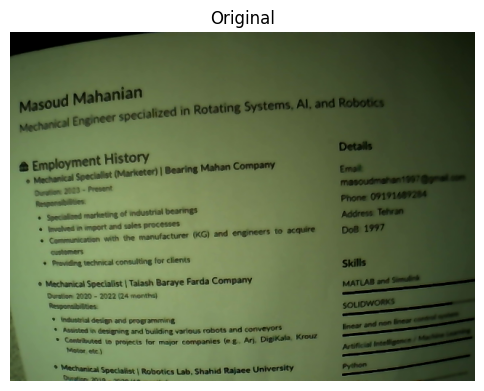

In [28]:
show_image(frame, "Original")

## preprocesseing

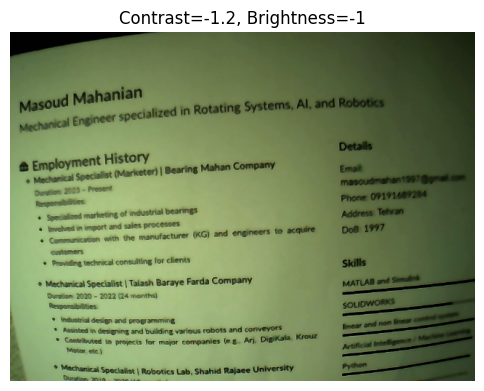

In [31]:
#Method 1: Brightness/Contrast Adjustment
alpha = -1.2  # Contrast multiplier (negative will invert colors)
beta = -1    # Brightness offset (negative makes image darker)
adjusted = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)
show_image(adjusted, f"Contrast={alpha}, Brightness={beta}")

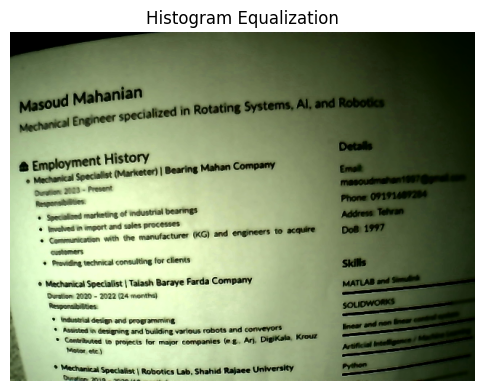

In [33]:
# Method 2: Histogram Equalization
ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y_equalized = cv2.equalizeHist(y)
ycrcb_equalized = cv2.merge((y_equalized, cr, cb))
hist_eq = cv2.cvtColor(ycrcb_equalized, cv2.COLOR_YCrCb2BGR)
show_image(hist_eq, "Histogram Equalization")

In [35]:
import numpy as np

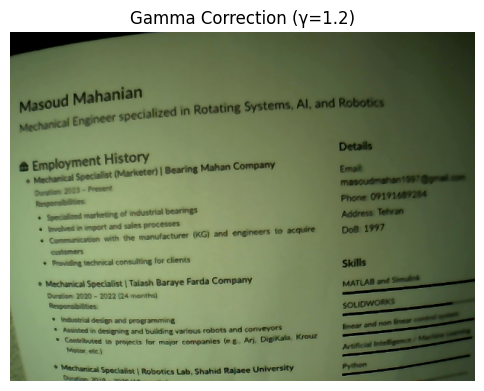

In [37]:
# Method 3: Gamma Correction
gamma = 1.2
inv_gamma = 1.0 / gamma
table = np.array([( (i / 255.0) ** inv_gamma ) * 255 
                  for i in range(256)]).astype("uint8")
gamma_corrected = cv2.LUT(frame, table)# Apply gamma correction using lookup table
show_image(gamma_corrected, f"Gamma Correction (γ={gamma})")

## EasyOCR

In [39]:
import easyocr

In [57]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])
# Function to draw OCR results for Original
results = reader.readtext(frame, detail=1)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


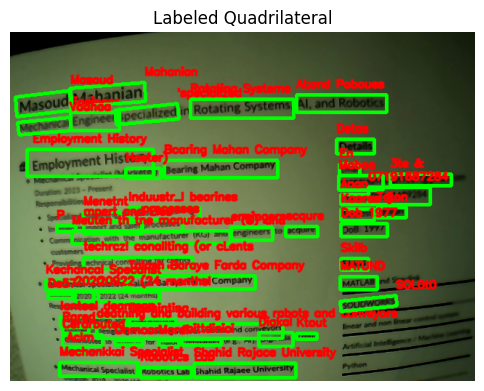

In [100]:
frame_copy = frame.copy()
i=0
for result in results:
    
    points = np.array(result[0],np.int32)
    points = points.reshape((-1, 1, 2))
    points
    cv2.polylines(frame_copy, [points], isClosed=True, color=(0, 255, 0), thickness=3)
    if i<50:
        top_point = points[points[:, 0, 1].argmin()][0]
        text_position = (top_point[0], top_point[1] - 10) 
        cv2.putText(
        frame_copy,
        result[1],           # متن قابل تغییر
        text_position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 255),                 # رنگ قرمز
        2,
        cv2.LINE_AA
        )
    i+=1
show_image(frame_copy, "Labeled Quadrilateral")

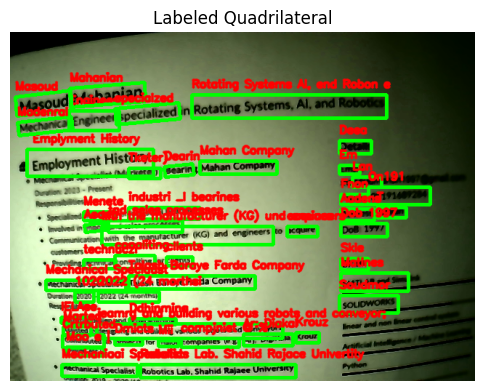

In [115]:
# Function to draw OCR results for Method 1
results = reader.readtext(hist_eq, detail=1)
frame_copy = hist_eq.copy()
i=0
for result in results:
    
    points = np.array(result[0],np.int32)
    points = points.reshape((-1, 1, 2))
    points
    cv2.polylines(frame_copy, [points], isClosed=True, color=(0, 255, 0), thickness=3)
    if i<50:
        top_point = points[0][0]
        text_position = (top_point[0], top_point[1] - 10) 
        cv2.putText(
        frame_copy,
        result[1],           # متن قابل تغییر
        text_position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 255),                 # رنگ قرمز
        2,
        cv2.LINE_AA
        )
    i+=1
show_image(frame_copy, "Labeled Quadrilateral")

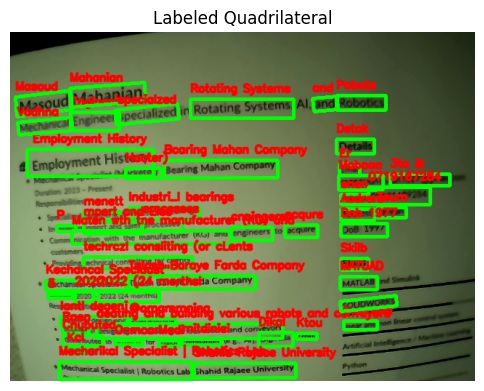

In [116]:
# Function to draw OCR results for Method 2
gamma_corrected
results = reader.readtext(gamma_corrected, detail=1)
frame_copy = gamma_corrected.copy()
i=0
for result in results:
    
    points = np.array(result[0],np.int32)
    points = points.reshape((-1, 1, 2))
    points
    cv2.polylines(frame_copy, [points], isClosed=True, color=(0, 255, 0), thickness=3)
    if i<50:
        top_point = points[0][0]
        text_position = (top_point[0], top_point[1] - 10) 
        cv2.putText(
        frame_copy,
        result[1],           # متن قابل تغییر
        text_position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 255),                 # رنگ قرمز
        2,
        cv2.LINE_AA
        )
    i+=1
show_image(frame_copy, "Labeled Quadrilateral")